# Lesson 1: Orbit Shape
In this notebook we'll work with the equations and parameters that describe the shape of an orbit in its plane. All code for the lesson is included in the file `utilities_l1.py`, with options in the notebook cells to write your own versions of the key functions.

Reminder: double click into a cell to edit, and make sure you run each cell (Ctrl + Enter) as you move down the notebook so that the functions and variables are in memory. 

## 1.1 Preliminaries
The first line imports code written in `utilities_l1.py` so that it can used in this notebook. To access the functions in that file use `utils.name_of_function`

The second line imports Python's built-in math module, which contains functions like `math.cos()` and `math.sqrt()`.

The third line imports a part of the matplotlib library used for plotting data.

The final four lines define useful constants (also defined in `utilities_l1.py`)

Note: unless otherwise stated, base units are meters, seconds, kilogram, radians

In [2]:
import utilities_l1 as utils
import math
import matplotlib.pyplot as plt

RADIUS_EARTH = 6371008.0
MU_EARTH = 398600441500000.0
RADIAN_TO_DEGREE = 57.2957795131
DEGREE_TO_RADIAN = 0.01745329251

## 1.2 Polar Orbit Equation
This equation describes the distance between the center of the Earth and the satellite (`r`) (note: not altitude!) as function of the angle that the satellite has progressed around its orbit (`theta`). The `theta = 0` occurs at the minimum value of `r` (perigee).

If `theta` (radians) is the input to the equation, and `r` (meters) is the output, then there are two other constants in the equation that describe the orbit:
- `a`: semi-major axis (meters), describes how big/small the orbit is
- `e`: eccentricity (unitless), describes the shape of the orbit (note: for closed orbits discussed here `0 <= e < 1`)

Here's the Polar Orbit Equation:

$$
r = \frac{a(1-e^2)}{1 + e\cos{\theta}}
$$

The function `compute_orbit_radius` below returns the value of `r` for a given trio of `a`, `e`, and `theta`. Can you replace the `r = utils...` line with your own implementation of the polar orbit equation?

In [3]:
def compute_orbit_radius(a, e, theta):
    # replace the line below with your own implementation (if you want) (can be multiple lines)
    r = utils.compute_orbit_radius(a, e, theta)
    
    return r

Play around with a few values of `a, e, theta` (meters and radians!) to see what happens to `r` (make sure you run the cell above!)

In [4]:
r = compute_orbit_radius(10000000, 0.3, 0)
print(r)

7000000.0


In [18]:
def test_fun(a):
    a.append(55)
    print(a)
    
b = [1,2,3]
print(b)
test_fun(b)
print(b)

[1, 2, 3]
[1, 2, 3, 55]
[1, 2, 3, 55]


## 1.3 Plot Polar Orbit Equation
A single number isn't very interesting. More interesting: what does the relationship between `r` and `theta` look like across multiple values (for constant `a, e`)?

We can use the function we defined above, `compute_orbit_radius` to compute many values of `r` from many different `theta`, and then store the results in a list for use below.

In [5]:
# variables you can change
a = 10000000
e = 0.2

# these are empty lists that we will append data to in the loop below
theta_list = []
r_list = []

# the for loop steps through each value of i from 0 to 99
for i in range(100):
    theta = i * 0.0629 # value selected to go through two-pi in 100 steps
    r = compute_orbit_radius(a, e, theta)
    
    theta_list.append(theta)
    r_list.append(r)

Now plot the values `r` vs `theta` using matplotlib. Don't worry too much about this code until you want to learn more about customizing visualizations.

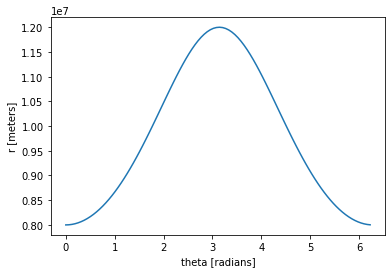

In [6]:
fig, ax = plt.subplots()
ax.plot(theta_list, r_list)
ax.set_xlabel("theta [radians]")
ax.set_ylabel("r [meters]")
plt.show()

## 1.4 Convert Polar to Cartesian
That's also not very informative. What we really want is to visualize the orbit as a trajectory in space, and to that we need to convert from polar coordinate (`r`, `theta`) to cartesian coordinates (`x`, `y`).

This is not a bad conversion, all we need is some simple trig:

![](images/coordinates-triangle.gif)

The function `convert_polar_to_cartesian` below converts a single `r, theta` pair in polar coordinates to the `x, y` cartesian equivalent. Can you replace the `x, y = utils...` line with your own implementation of the conversion ? (definitely use multiples lines)

In [7]:
def convert_polar_to_cartesian(r, theta):
    # replace the line below with your own implementation (if you want) (can be multiple lines)
    x, y = utils.convert_polar_to_cartesian(r, theta)
    
    return x, y

Play around with a few values of `r, theta` to make sure the output makes sense

In [8]:
x, y = convert_polar_to_cartesian(1, math.pi/2)
print(x, y)

6.123233995736766e-17 1.0


## 1.5 Visualize an Orbit
Now we can put the pieces together and visualize a full orbit in cartesian space. We will 1) loop through many values of `theta` between 0 and two pi radians, 2) compute `r` using the polar orbit equation, 3) convert the `r,theta` pair to cartesian `x,y`, and 4) store those values in a list for later plotting. 

In [9]:
# variables you can change
a = 10000000
e = 0.2
N = 100 # number of theta values to plot

# these are empty lists that we will append data to in the loop below
x_list = []
y_list = []

# the for loop steps through each value of i from 0 to 99
for i in range(N):
    theta = i * 2 * math.pi / N
    r = compute_orbit_radius(a, e, theta)
    
    x, y = convert_polar_to_cartesian(r, theta)
    
    x_list.append(x)
    y_list.append(y)

The utilities file contains a helper function `add_trajectory` for plotting an orbit that adds an earth-sized circle at the origin and setting axis limits/scaling. Inputs are the list of x coordinates and y coordinates of the orbit.

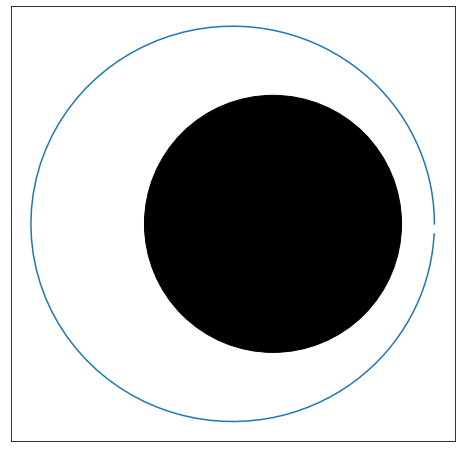

In [10]:
ax = utils.add_trajectory(x_list, y_list)

## 1.6 Ground Track - First Attempt
All the work above shows us the 2D trajectory of a satellite in the _orbit plane_. This is useful, but doesn't tell the whole story. Another way to visualize an orbit is to trace out the point directly below the satellite on the surface of the Earth as it moves through its orbit. This is called the _ground track_.

To do this we need some more information about the orbit. The orbit plane trajectory above visualizes three orbital elements:
- `a`: semi-major axis, size of the orbit
- `e`: eccentricity, shape of the orbit
- `theta`: true anomaly, where in the orbit we are right now relative to perigee (we varied `theta` to trace out the orbit)

But there are three more orbital elements, which together describe the orientation of the orbit plane in 3D space:
- `i`: inclination, the tilt of the orbit relative to the equator
- `raan`: right ascension of the ascending node, where the line of intersection between orbital and equatorial planes points
- `argp`: argument of perigee, where perigee occurs relative to the orbit/equator crossing

Together these six _Keplerian Orbital Elements_ (5 constants, 1 variable) define an orbit and where you are in it.

<img src="images/elements.png" width="400"/>

Similar to how we could convert orbit polar coordinates (`r, theta`) to 2D cartesian coordinates (`x,y`) we can convert the six orbital elements into 3D cartesian coordinates (`x,y,z`) for position and velocity. The equations for this conversion are beyond the scope of this exercise, and are included in `utilities_l1.py` as `convert_kepler_to_cartesian` (see [here](https://downloads.rene-schwarz.com/download/M001-Keplerian_Orbit_Elements_to_Cartesian_State_Vectors.pdf) for detailed reference)

Once we have our orbit in 3D cartesian coordinates, we need a way to project that trajectory to 2D. There are many ways to do this, but the simplest is to convert each point in the orbit to its corresponding _latitude_, _longitude_ and _altitude_, and then use only the first two, which will represent the point on the earth directly below the satellite.

The function `convert_cartesian_to_lla` below converts a single `x,y,z` triplet to its `lat, lon, alt` equivalent. Can you replace the `lat,lon,alt = utils...` line with your own implementation of the conversion ? (definitely use multiples lines)

In [12]:
def convert_cartesian_to_lla(x, y, z):
    # replace the line below with your own implementation (if you want) (can be multiple lines)
    lat, lon, alt = utils.convert_cartesian_to_lla(x, y, z)
    
    return lat, lon, alt

We're now ready to build the ground track as a list of latitudes and a list of longitudes as the satellite moves through its orbit.

In [37]:
# variables you can change
a = 100000000
e = 0.1
i = 70 * DEGREE_TO_RADIAN
raan = 45 * DEGREE_TO_RADIAN
argp = 0 * DEGREE_TO_RADIAN
N = 100 # number of theta values to plot

# these are empty lists that we will append data to in the loop below
lat_list = []
lon_list = []

# the for loop steps through each value of i from 0 to 99
for j in range(N):
    theta = j * 2 * math.pi / N
    x, y, z, vx, vy, vz = utils.convert_kepler_to_cartesian(a, e, i, raan, argp, theta)
    
    lat, lon, alt = convert_cartesian_to_lla(x, y, z)
    
    lat_list.append(lat)
    lon_list.append(lon)

The utilities includes a `add_latlon_trajectory` function to overlay the ground track on top of an equirectangular map projection. Don't worry about the contents of this function unless you want to dive into the weeds of how the visualization works.

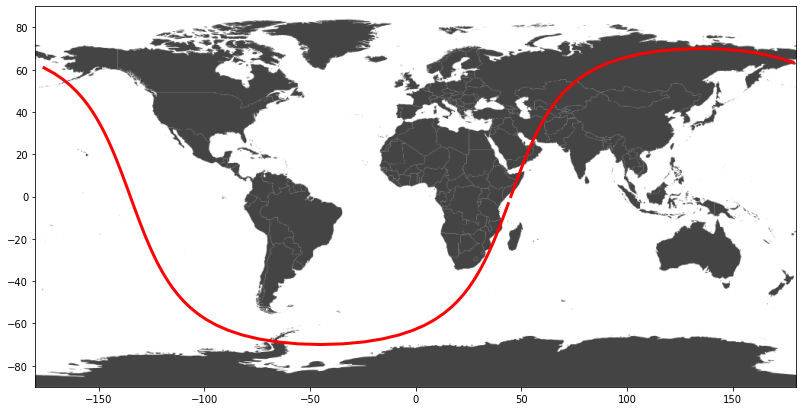

In [42]:
ax = utils.add_latlon_trajectory(lat_list, lon_list)

## 1.7 Critical Thinking
What happens to the ground track when you vary the eccentricity? How about the semi-major axis?

Does this make sense?

What have we not modeled that is causing our ground track to be off?

Hint: What frame of reference is the orbit defined in (the output `x,y,z` from `convert_kepler_to_cartesian`)? What frame of reference is the ground track defined in (the output `lat,lon` from `convert_cartesian_to_lla`)?